In [9]:
import pandas as pd

In [10]:
# Importar libreria para dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [11]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# se utiliza para codificar variables categóricas en variables numéricas
from sklearn.preprocessing import LabelEncoder

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [12]:
np.set_printoptions(suppress=True, precision=6)

In [13]:
#Carga de dataset
data = pd.read_csv('/content/Bank_registries.csv', header=0)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [15]:
#elimando columnas
columnas = ['RowNumber', 'CustomerId', 'Surname']
data.drop(columnas, axis=1, inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [17]:
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [18]:
print(columnas_categoricas)

Index(['Geography', 'Gender'], dtype='object')


In [19]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  # se crea una instancia (se utiliza para convetir categoricos a numericos)
  le = LabelEncoder()
  # cambia de categoricos a numericos unico
  data[columna] = le.fit_transform(data[columna])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [21]:
# Division de dataset en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [22]:
print(train_data)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
9254          686          0       1   32       6       0.00              2   
1561          632          1       1   42       4  119624.60              2   
1670          559          2       1   24       3  114739.92              1   
6087          561          0       0   27       9  135637.00              1   
6669          517          0       1   56       9  142147.32              1   
...           ...        ...     ...  ...     ...        ...            ...   
5734          768          0       1   54       8   69712.74              1   
5191          682          0       0   58       1       0.00              1   
5390          735          0       0   38       1       0.00              3   
860           667          0       1   43       8  190227.46              1   
7270          697          1       1   51       1  147910.30              1   

      HasCrCard  IsActiveMember  EstimatedSalary  E

In [23]:
print(test_data)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
6252          596          1       1   32       3   96709.07              2   
4684          623          0       1   43       1       0.00              2   
1731          601          2       0   44       4       0.00              2   
4742          506          1       1   59       8  119152.10              2   
4521          560          2       0   27       7  124995.98              1   
...           ...        ...     ...  ...     ...        ...            ...   
6412          602          1       0   53       5   98268.84              1   
8285          609          0       1   25      10       0.00              1   
7853          730          0       0   47       7       0.00              1   
1095          692          0       1   29       4       0.00              1   
6929          628          1       1   39       1  115341.19              1   

      HasCrCard  IsActiveMember  EstimatedSalary  E

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 9254 to 7270
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      8000 non-null   int64  
 1   Geography        8000 non-null   int64  
 2   Gender           8000 non-null   int64  
 3   Age              8000 non-null   int64  
 4   Tenure           8000 non-null   int64  
 5   Balance          8000 non-null   float64
 6   NumOfProducts    8000 non-null   int64  
 7   HasCrCard        8000 non-null   int64  
 8   IsActiveMember   8000 non-null   int64  
 9   EstimatedSalary  8000 non-null   float64
 10  Exited           8000 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 750.0 KB


In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 6252 to 6929
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      2000 non-null   int64  
 1   Geography        2000 non-null   int64  
 2   Gender           2000 non-null   int64  
 3   Age              2000 non-null   int64  
 4   Tenure           2000 non-null   int64  
 5   Balance          2000 non-null   float64
 6   NumOfProducts    2000 non-null   int64  
 7   HasCrCard        2000 non-null   int64  
 8   IsActiveMember   2000 non-null   int64  
 9   EstimatedSalary  2000 non-null   float64
 10  Exited           2000 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 187.5 KB


In [26]:
train_data.to_csv("train.csv", index=False)

In [27]:
test_data.to_csv("test.csv", index=False)

In [28]:
#Carga de dataset
data = pd.read_csv('/content/train.csv')

In [29]:
print(data)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             686          0       1   32       6       0.00              2   
1             632          1       1   42       4  119624.60              2   
2             559          2       1   24       3  114739.92              1   
3             561          0       0   27       9  135637.00              1   
4             517          0       1   56       9  142147.32              1   
...           ...        ...     ...  ...     ...        ...            ...   
7995          768          0       1   54       8   69712.74              1   
7996          682          0       0   58       1       0.00              1   
7997          735          0       0   38       1       0.00              3   
7998          667          0       1   43       8  190227.46              1   
7999          697          1       1   51       1  147910.30              1   

      HasCrCard  IsActiveMember  EstimatedSalary  E

In [30]:
X = data.iloc[:, :10]
y = data.iloc[:, 10]
m = y.size

In [31]:
print(X)
print('*'*25)
print(y)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             686          0       1   32       6       0.00              2   
1             632          1       1   42       4  119624.60              2   
2             559          2       1   24       3  114739.92              1   
3             561          0       0   27       9  135637.00              1   
4             517          0       1   56       9  142147.32              1   
...           ...        ...     ...  ...     ...        ...            ...   
7995          768          0       1   54       8   69712.74              1   
7996          682          0       0   58       1       0.00              1   
7997          735          0       0   38       1       0.00              3   
7998          667          0       1   43       8  190227.46              1   
7999          697          1       1   51       1  147910.30              1   

      HasCrCard  IsActiveMember  EstimatedSalary  


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      8000 non-null   int64  
 1   Geography        8000 non-null   int64  
 2   Gender           8000 non-null   int64  
 3   Age              8000 non-null   int64  
 4   Tenure           8000 non-null   int64  
 5   Balance          8000 non-null   float64
 6   NumOfProducts    8000 non-null   int64  
 7   HasCrCard        8000 non-null   int64  
 8   IsActiveMember   8000 non-null   int64  
 9   EstimatedSalary  8000 non-null   float64
 10  Exited           8000 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 687.6 KB


In [33]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # Convierte la entrada a un arreglo numpy
    z = np.array(z)

    # Limita los valores de z para evitar overflow
    z = np.clip(z, -500, 500)

    g = 1 / (1 + np.exp(-z))

    return g

In [34]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [35]:
def  featureNormalize(X):
    # Se crea una copia del conjunto de datos X para evitar modificar los datos originales.
    X_norm = X.copy()
    # se crea un arreglo de 0 para almacenar la media y desviacion estandar
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # media
    mu = np.mean(X, axis = 0)
    # desviacion estandar
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [36]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('*'*20)
print('Media calculada:', mu)
print('*'*20)
print('Desviación estandar calculada:', sigma)
print('*'*20)
print(X_norm)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             686          0       1   32       6       0.00              2   
1             632          1       1   42       4  119624.60              2   
2             559          2       1   24       3  114739.92              1   
3             561          0       0   27       9  135637.00              1   
4             517          0       1   56       9  142147.32              1   
...           ...        ...     ...  ...     ...        ...            ...   
7995          768          0       1   54       8   69712.74              1   
7996          682          0       0   58       1       0.00              1   
7997          735          0       0   38       1       0.00              3   
7998          667          0       1   43       8  190227.46              1   
7999          697          1       1   51       1  147910.30              1   

      HasCrCard  IsActiveMember  EstimatedSalary  


In [37]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
print(m)
print(n)
# Agrega el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

print(X[5])

8000
10
[ 1.       -0.857695 -0.90555   0.913248  0.199866 -0.348369  0.706747
 -0.916688  0.649203 -1.025834  1.09047 ]


In [38]:
print(X)

[[ 1.        0.3565   -0.90555  ...  0.649203  0.974817  1.36767 ]
 [ 1.       -0.203898  0.301649 ...  0.649203  0.974817  1.661254]
 [ 1.       -0.961472  1.508847 ...  0.649203 -1.025834 -0.252807]
 ...
 [ 1.        0.865009 -0.90555  ... -1.540351 -1.025834 -0.142765]
 [ 1.        0.159323 -0.90555  ...  0.649203 -1.025834 -0.050826]
 [ 1.        0.470655  0.301649 ...  0.649203  0.974817 -0.814568]]


In [39]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    #epsilon = 1e-8

    J = 0
    h = sigmoid(X.dot(theta.T))

    epsilon = 1e-10  # Un valor pequeño para evitar divisiones por cero
    J = (1 / m) * np.sum(-y.dot(np.log(h + epsilon)) - (1 - y).dot(np.log(1 - h + epsilon)))

    # J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [40]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [41]:
data = pd.read_csv('/content/test.csv')
print(data)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             596          1       1   32       3   96709.07              2   
1             623          0       1   43       1       0.00              2   
2             601          2       0   44       4       0.00              2   
3             506          1       1   59       8  119152.10              2   
4             560          2       0   27       7  124995.98              1   
...           ...        ...     ...  ...     ...        ...            ...   
1995          602          1       0   53       5   98268.84              1   
1996          609          0       1   25      10       0.00              1   
1997          730          0       0   47       7       0.00              1   
1998          692          0       1   29       4       0.00              1   
1999          628          1       1   39       1  115341.19              1   

      HasCrCard  IsActiveMember  EstimatedSalary  E

In [42]:
fila_deseada = 0

if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].tolist()
  print(fila_completa)
else:
  print("La fila no existe")

[596.0, 1.0, 1.0, 32.0, 3.0, 96709.07, 2.0, 0.0, 0.0, 41788.37, 0.0]


theta calculado por el descenso por el gradiente: [-1.198818 -0.046457  0.060457 -0.180182  0.502717 -0.023204  0.191434
 -0.04171  -0.004472 -0.312156  0.015294]
1.0


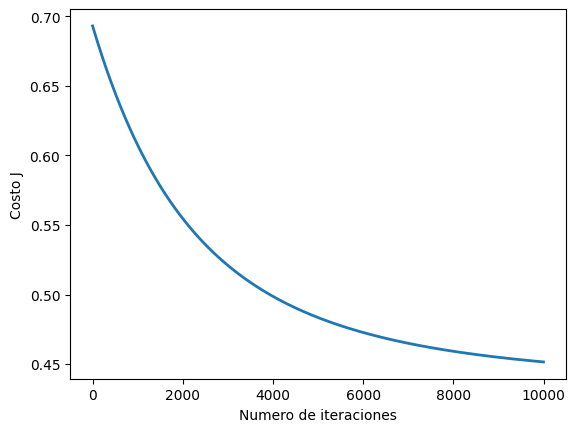

In [43]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 #0.001
num_iters = 10000 # 100

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(11)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = [1, 596.0, 1.0, 1.0, 32.0, 3.0, 96709.07, 2.0, 0.0, 0.0, 41788.37]
aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(aprueba)

# print(f" (usando el descenso por el gradiente):{aprueba}")


In [49]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    epsilon = 1e-10  # Un valor pequeño para evitar divisiones por cero
    J = (1 / m) * np.sum(-y.dot(np.log(h + epsilon)) - (1 - y).dot(np.log(1 - h + epsilon)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [50]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[ 0.2945    0.011842 -0.015964  0.043024 -0.114421  0.005395 -0.047849
  0.020611  0.002615  0.063261 -0.0044  ]
Gradiente en theta inicial (zeros):
	[0.2945, 0.0118, -0.0160]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [51]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([1, 596.0, 1.0, 1.0, 32.0, 3.0, 96709.07, 2.0, 0.0, 0.0, 41788.37])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.043, 2.566, 2.647]')

[    1.     596.       1.       1.      32.       3.   96709.07     2.
     0.       0.   41788.37]
Costo en theta prueba: 11.067
Costo esperado (aproximado): 0.218

Gradiente en theta prueba:
	[0.339, 0.015, 0.017]
Gradiente esperado (aproximado):
	[0.043, 2.566, 2.647]


In [52]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[-25.161, 0.206, 0.201]')

Costo con un valor de theta encontrado por optimize.minimize: 0.438
Costo esperado (aproximado): 0.203

theta:
	[-1.616, -0.067, 0.090]
Theta esperado (aproximado):
	[-25.161, 0.206, 0.201]


<ipython-input-52-0dfcfa2e2ef1>:7: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res = optimize.minimize(costFunction,


In [61]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

In [54]:
def plotDecisionBoundary(plotData, theta, X, y):
    """
    Grafica los puntos X y Y en una nueva figura con un limite de desicion definido por theta.
    the data points X and y into a new figure with the decision boundary defined by theta.
    Grafica los puntos con * para los ejemplos positivos y con o para los ejemplos negativos.

    Parametros:
    ----------
    plotData : func
        A function reference for plotting the X, y data.

    theta : array_like
        Parametros para la regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Data set de entrada. Se supone que X es una de las siguientes:
            1) Matriz Mx3, donde la primera columna es una columna de unos para intercepción.
            2) Matriz MxN, N> 3, donde la primera columna son todos unos.

    y : array_like
        Vector de datos de etiquetas de la forma (m, ).
    """
    # hacer que theta sera un arreglo numpy
    theta = np.array(theta)
      # Graficar los datos (recordar que la primera columna en X es la intercepción)
    plotData(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Solo se requieren 2 puntos para definir una linea, para lo cual se eligen dos puntos finales
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calcular la línea límite de decisión
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        print(plot_x)
        print(plot_y)
        # Graficar y ajustar los ejes para una mejor visualización
        pyplot.plot(plot_x, plot_y)

        # Leyenda, especifica para el ejercicio
        pyplot.legend(['Admitido', 'No admitido', 'Limite de decisión'])
        pyplot.xlim([30, 100])
        pyplot.ylim([30, 100])
    else:
        # Rango de la grilla
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evalua z = theta*x sobre la grilla
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # importante transponer z antes de llamar al contorno
        # print(z)

        # Plot z = 0
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)


NameError: ignored

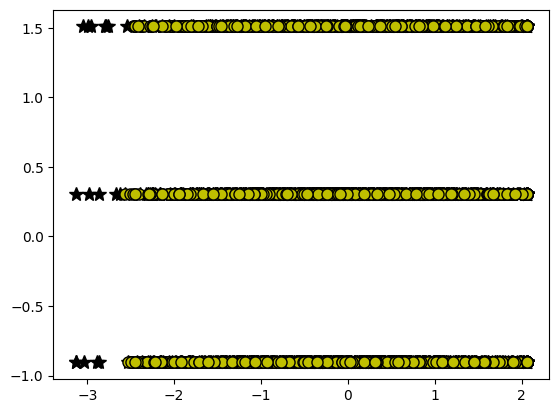

In [62]:
# Graficar limites
plotDecisionBoundary(plotData, theta, X, y)

In [56]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Datos utilizados para el calculo de las predicciones.
        La fila es el numero de los puntos para calcular las predicciones,
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [63]:
#  Predice la probabilidad de ingreso para un estudiante con nota de 45 en el examen 1 y nota de 85 en el examen 2
prob = sigmoid(np.dot([1, 596.0, 1.0, 1.0, 32.0, 3.0, 96709.07, 2.0, 0.0, 0.0, 41788.37], theta))
print (prob)
# print('Para un estudiante con notas de 45 y 85, se predice una probabilidad de admisión de: {:.3f}%'.format(prob))
# print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
# print('Precisión esperada (aproximadamente): 89.00 %')

1.0
Precisión de entrenamiento: 80.67 %
